<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ragnar Betancourt

**Fecha:** 23 de noviembre de 2021.

**Expediente** : if717467.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8 
    https://github.com/betancourtp09/SPF_Tarea8_Betancourt

In [136]:
#importar las paqueterias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

#opciones para pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

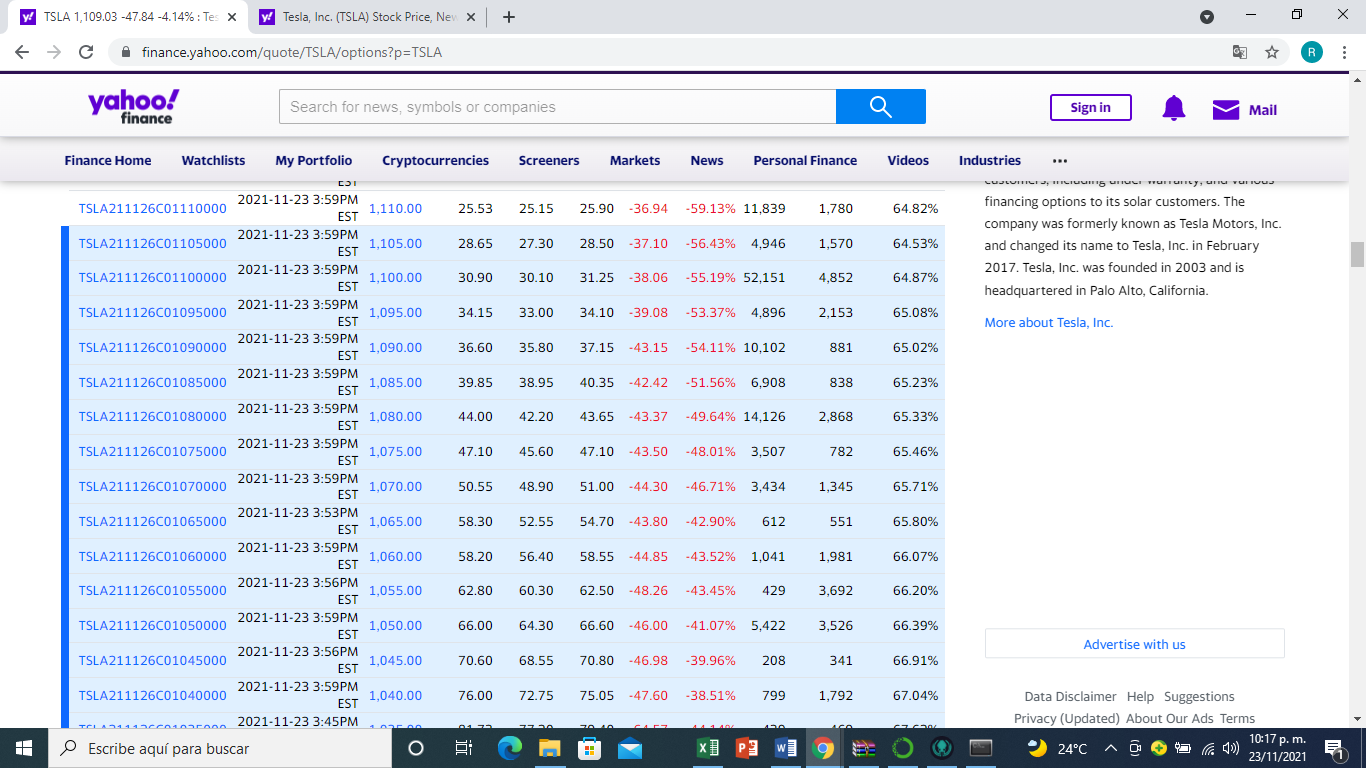

In [137]:
# función para descargar los precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #  necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

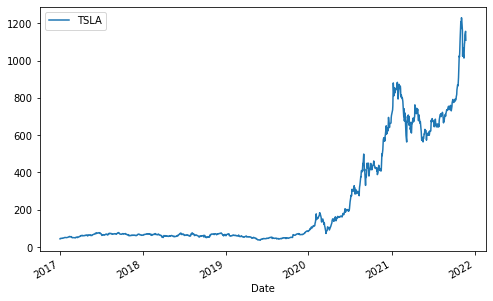

In [138]:
ticker = ['TSLA']
start_date = '2017-01-01'

closes_tsla = get_adj_closes(ticker, start_date)
closes_tsla.plot(figsize=(8,5));
plt.legend(ticker);

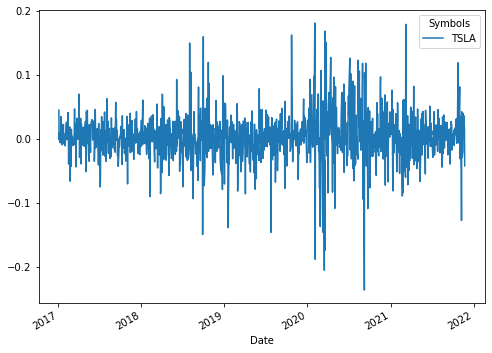

In [139]:
ret_tsla = calc_daily_ret(closes_tsla)
ret_tsla.plot(figsize =(8,6));

In [140]:
# obtenemos el rendimiento simple
Ri = closes_tsla.pct_change(1).iloc[1:]

# obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2021-11-17,0.033
2021-11-18,0.007
2021-11-19,0.037


In [141]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-08-15'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
                '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
                '2022-08-12', '2022-08-15'],
               dtype='datetime64[ns]', length=190, freq='B'),
 190)

In [142]:
ri = calc_daily_ret(closes_tsla)

# media y DE de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# simulador del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# simulacion normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# simulacion del precio
S_0 = closes_tsla.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [143]:
mu = ret_tsla.mean()[0]
sigma = ret_tsla.std()[0]
mu, sigma

(0.0026305419927991074, 0.0379263331559284)

In [144]:
# tasa de bonos de 1 año de fecha 11/23/21 -> 0.21%
r = 0.00021/360 # Tasa diaria

In [145]:
today = pd.to_datetime(date.today())
expiry = '2022-08-15'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-15'],
              dtype='datetime64[ns]', length=190, freq='B')

In [146]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.009,-0.032,-0.037,...,-0.052,-0.014,-0.065
2021-11-24,-0.010,0.003,-0.034,...,-0.064,-0.018,-0.049
2021-11-25,-0.007,0.065,-0.053,...,-0.099,0.073,-0.052
2021-11-26,0.005,-0.016,-0.001,...,-0.109,0.053,-0.076
2021-11-29,0.039,-0.053,-0.018,...,-0.197,0.071,-0.075
...,...,...,...,...,...,...,...
2022-08-09,-0.787,-0.194,-0.571,...,0.234,-0.230,-0.318
2022-08-10,-0.778,-0.231,-0.476,...,0.211,-0.181,-0.355
2022-08-11,-0.754,-0.230,-0.470,...,0.224,-0.163,-0.338
2022-08-12,-0.751,-0.282,-0.493,...,0.288,-0.178,-0.372


In [147]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.039,0.024,0.020,...,0.026,-0.010,-6.334e-04
2021-11-24,0.015,-0.035,0.040,...,0.064,-0.024,-2.447e-02
2021-11-25,-0.007,0.035,-0.003,...,0.024,-0.076,-2.507e-02
2021-11-26,-0.055,-0.001,-0.047,...,0.063,-0.057,-9.417e-03
2021-11-29,-0.047,-0.031,-0.058,...,0.124,-0.094,2.707e-02
...,...,...,...,...,...,...,...
2022-08-09,-0.259,0.063,-0.561,...,0.586,-0.096,3.712e-01
2022-08-10,-0.270,0.070,-0.476,...,0.543,-0.096,3.991e-01
2022-08-11,-0.305,0.025,-0.489,...,0.512,-0.065,4.084e-01
2022-08-12,-0.245,0.034,-0.513,...,0.537,-0.078,4.468e-01


In [148]:
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,1153.475,1136.258,1131.002,...,1138.444,1098.267,1108.328
2021-11-24,1126.244,1070.798,1154.813,...,1182.269,1082.637,1082.220
2021-11-25,1100.872,1148.904,1105.828,...,1135.840,1027.453,1081.576
2021-11-26,1049.355,1107.747,1058.213,...,1181.242,1047.125,1098.635
2021-11-29,1058.420,1074.687,1046.721,...,1255.790,1009.102,1139.457
...,...,...,...,...,...,...,...
2022-08-09,856.219,1181.181,632.821,...,1992.722,1007.275,1607.475
2022-08-10,846.357,1189.698,689.155,...,1908.276,1007.409,1652.975
2022-08-11,817.800,1136.679,679.868,...,1850.365,1039.581,1668.401
2022-08-12,867.773,1147.167,664.272,...,1897.913,1025.559,1733.825


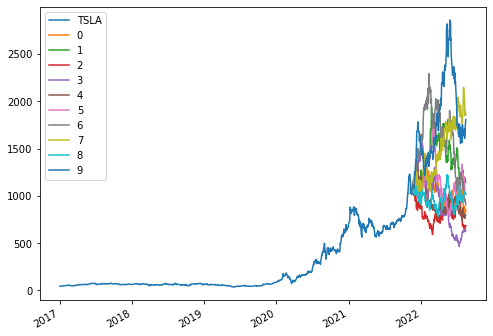

In [149]:
pd.concat([closes_tsla,sim_closes]).plot(figsize = (8,6));

In [150]:
from datetime import date
Hoy = date.today()
expiry = '2022-08-15'
# strike price
K = 1095 
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# simular los precios
sim_closes = S0*np.exp(sim_ret.cumsum())

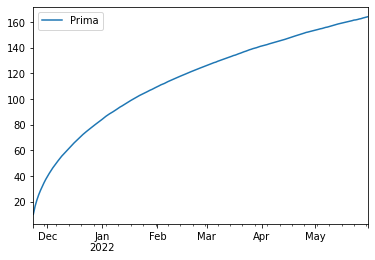

In [151]:
strike = 1095
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [152]:
call.iloc[-1]

Prima    164.276
Name: 2022-05-31 00:00:00, dtype: float64

In [153]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(159.84824120377587, 168.70415608974153)
(159.84829479873486, 168.70410249478255)


In [154]:
vol = ret_tsla['TSLA'].std()*np.sqrt(252)
media = ret_tsla['TSLA'].mean()*252
maduracion = ndays
st = closes_tsla.iloc[-1,0]
rf = r*360

In [156]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print(' Black Scholes :',put)
print(' opción simulado:',call.iloc[-1].values)

 Black Scholes : 253.64802881621546
 opción simulado: [164.27619865]
